# Feature Engineering for Player_actions_features_ PaRT2

# We are using Exploratory Dataset which are created in Player_actions_features_part1 - After_Player_Action_feature.csv
# 

In [1]:
import pandas as pd
import numpy as np
#importing seaborn for statistical plots
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
#
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, roc_curve, f1_score, classification_report, auc
from sklearn.cluster import KMeans
from scipy.stats import zscore
#
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
PAF_df_orig = pd.read_csv("After_Player_Action_feature.csv")

#PAF_df_orig.info()
PAF_df_orig.head()

Actor    A_Acc  Total_Logid_count  Killed_bypc_ratio  Killed_bypc_count  \
0   1047  6482393              97030           0.007111                690   
1   1049  6275719               3964           0.007568                 30   
2   1120  6596993               3809           0.000000                  0   
3   1164  6670686               3496           0.007437                 26   
4   1184  4220231               5039           0.001191                  6   

   Killed_bynpc_ratio  Killed_bynpc_count  Teleport_ratio  Teleport_count  \
0            0.001773                 172        0.010832            1051   
1            0.004036                  16        0.029768             118   
2            0.005251                  20        0.009714              37   
3            0.001716                   6        0.017449              61   
4            0.003374                  17        0.010716              54   

   Exp_get_ratio  ...    Exp_repair_count  Use_portal_ratio  Use_portal_count  \
0       0.155210  ...                  66          0.000021                 2   
1       0.136226  ...                   3          0.000505                 2   
2       0.156734  ...                  15          0.000000                 0   
3       0.178776  ...                   0          0.000000                 0   
4       0.180194  ...                   3          0.000000                 0   

   Abyss_get_ratio  Abyss_get_count  Money_get_ratio  Money_get_count  \
0         0.110636            10735         0.102010             9898   
1         0.028507              113         0.075429              299   
2         0.000000                0         0.097926              373   
3         0.080950              283         0.135584              474   
4         0.012502               63         0.092876              468   

   Item_get_ratio  Item_get_count   Type  
0        0.062847            6098  Human  
1        0.069122             274  Human  
2        0.135994             518  Human  
3        0.068650             240  Human  
4        0.080572             406  Human  

[5 rows x 24 columns]

In [3]:
# take the copy of the After_Player_Action_feature dataframe
#PAF_df_orig = PAF_df.copy()
PAF_df = PAF_df_orig.copy()

In [4]:
# Creating a numerical field for Type - as 'Human': 0, 'Bot': 1
PAF_df.Type.replace({'Human': 0, 'Bot': 1}, inplace=True)

In [5]:
type_dict = {0 : 'Human', 1: 'Bot'}
PAF_df.head()

Actor    A_Acc  Total_Logid_count  Killed_bypc_ratio  Killed_bypc_count  \
0   1047  6482393              97030           0.007111                690   
1   1049  6275719               3964           0.007568                 30   
2   1120  6596993               3809           0.000000                  0   
3   1164  6670686               3496           0.007437                 26   
4   1184  4220231               5039           0.001191                  6   

   Killed_bynpc_ratio  Killed_bynpc_count  Teleport_ratio  Teleport_count  \
0            0.001773                 172        0.010832            1051   
1            0.004036                  16        0.029768             118   
2            0.005251                  20        0.009714              37   
3            0.001716                   6        0.017449              61   
4            0.003374                  17        0.010716              54   

   Exp_get_ratio  ...   Exp_repair_count  Use_portal_ratio  Use_portal_count  \
0       0.155210  ...                 66          0.000021                 2   
1       0.136226  ...                  3          0.000505                 2   
2       0.156734  ...                 15          0.000000                 0   
3       0.178776  ...                  0          0.000000                 0   
4       0.180194  ...                  3          0.000000                 0   

   Abyss_get_ratio  Abyss_get_count  Money_get_ratio  Money_get_count  \
0         0.110636            10735         0.102010             9898   
1         0.028507              113         0.075429              299   
2         0.000000                0         0.097926              373   
3         0.080950              283         0.135584              474   
4         0.012502               63         0.092876              468   

   Item_get_ratio  Item_get_count  Type  
0        0.062847            6098     0  
1        0.069122             274     0  
2        0.135994             518     0  
3        0.068650             240     0  
4        0.080572             406     0  

[5 rows x 24 columns]

In [6]:
# To find the co-realtion and visualise the data, converting all the objective field value into Numeric using LabelEncoder
#It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels:

# Encoding categorical data

# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder = LabelEncoder()
# PAF_df['Type'] = labelencoder.fit_transform(PAF_df['Type'])
# PAF_df.head()

In [7]:
PAF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49584 entries, 0 to 49583
Data columns (total 24 columns):
Actor                 49584 non-null int64
A_Acc                 49584 non-null int64
Total_Logid_count     49584 non-null int64
Killed_bypc_ratio     49584 non-null float64
Killed_bypc_count     49584 non-null int64
Killed_bynpc_ratio    49584 non-null float64
Killed_bynpc_count    49584 non-null int64
Teleport_ratio        49584 non-null float64
Teleport_count        49584 non-null int64
Exp_get_ratio         49584 non-null float64
Exp_get_count         49584 non-null int64
Reborn_ratio          49584 non-null float64
Reborn_count          49584 non-null int64
Exp_repair_ratio      49584 non-null float64
Exp_repair_count      49584 non-null int64
Use_portal_ratio      49584 non-null float64
Use_portal_count      49584 non-null int64
Abyss_get_ratio       49584 non-null float64
Abyss_get_count       49584 non-null int64
Money_get_ratio       49584 non-null float64
Money_get_cou

In [8]:
PAF_df.describe()

Actor         A_Acc  Total_Logid_count  Killed_bypc_ratio  \
count   49584.000000  4.958400e+04       4.958400e+04       49584.000000   
mean   344927.685120  8.486798e+06       7.716908e+04           0.001097   
std    127674.734571  1.956481e+06       1.845887e+05           0.003153   
min      1047.000000  1.527200e+04       9.000000e+00           0.000000   
25%    272154.500000  6.879272e+06       3.664000e+03           0.000000   
50%    400570.500000  8.290749e+06       1.591400e+04           0.000188   
75%    442259.750000  1.043205e+07       7.197300e+04           0.001128   
max    472898.000000  1.136939e+07       5.945654e+06           0.113352   

       Killed_bypc_count  Killed_bynpc_ratio  Killed_bynpc_count  \
count       49584.000000        49584.000000        49584.000000   
mean           96.042957            0.001996           94.222511   
std           292.152521            0.002277          191.995832   
min             0.000000            0.000000            0.000000   
25%             0.000000            0.000416            3.000000   
50%             3.000000            0.001461           19.000000   
75%            45.000000            0.002821           96.000000   
max          7388.000000            0.079879         4552.000000   

       Teleport_ratio  Teleport_count  Exp_get_ratio      ...       \
count    49584.000000    49584.000000   49584.000000      ...        
mean         0.009787      454.197826       0.156631      ...        
std          0.006926      805.980768       0.080061      ...        
min          0.000000        0.000000       0.000000      ...        
25%          0.004956       27.000000       0.119699      ...        
50%          0.009410      117.000000       0.159825      ...        
75%          0.013573      491.000000       0.190959      ...        
max          0.134793    14336.000000       0.794118      ...        

       Exp_repair_count  Use_portal_ratio  Use_portal_count  Abyss_get_ratio  \
count      49584.000000      49584.000000      49584.000000     49584.000000   
mean          20.370482          0.000030          0.988182         0.025457   
std           45.305890          0.000155          3.263916         0.036917   
min            0.000000          0.000000          0.000000         0.000000   
25%            0.000000          0.000000          0.000000         0.000000   
50%            5.000000          0.000000          0.000000         0.002088   
75%           21.000000          0.000000          0.000000         0.043410   
max         1464.000000          0.007911         91.000000         0.217240   

       Abyss_get_count  Money_get_ratio  Money_get_count  Item_get_ratio  \
count     49584.000000     49584.000000     49584.000000    49584.000000   
mean       2341.692360         0.063992      4399.147427        0.130661   
std        5967.466289         0.047967     14399.058848        0.066233   
min           0.000000         0.000000         0.000000        0.000000   
25%           0.000000         0.023505       142.000000        0.086272   
50%          30.000000         0.063526       634.000000        0.128295   
75%        1102.000000         0.091698      3212.500000        0.166167   
max      132445.000000         0.434605    332142.000000        0.489614   

       Item_get_count          Type  
count    4.958400e+04  49584.000000  
mean     1.357207e+04      0.155131  
std      4.224471e+04      0.362033  
min      0.000000e+00      0.000000  
25%      4.120000e+02      0.000000  
50%      1.862000e+03      0.000000  
75%      8.771750e+03      0.000000  
max      1.076296e+06      1.000000  

[8 rows x 24 columns]

# Find corelation with the features created in the dataset

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


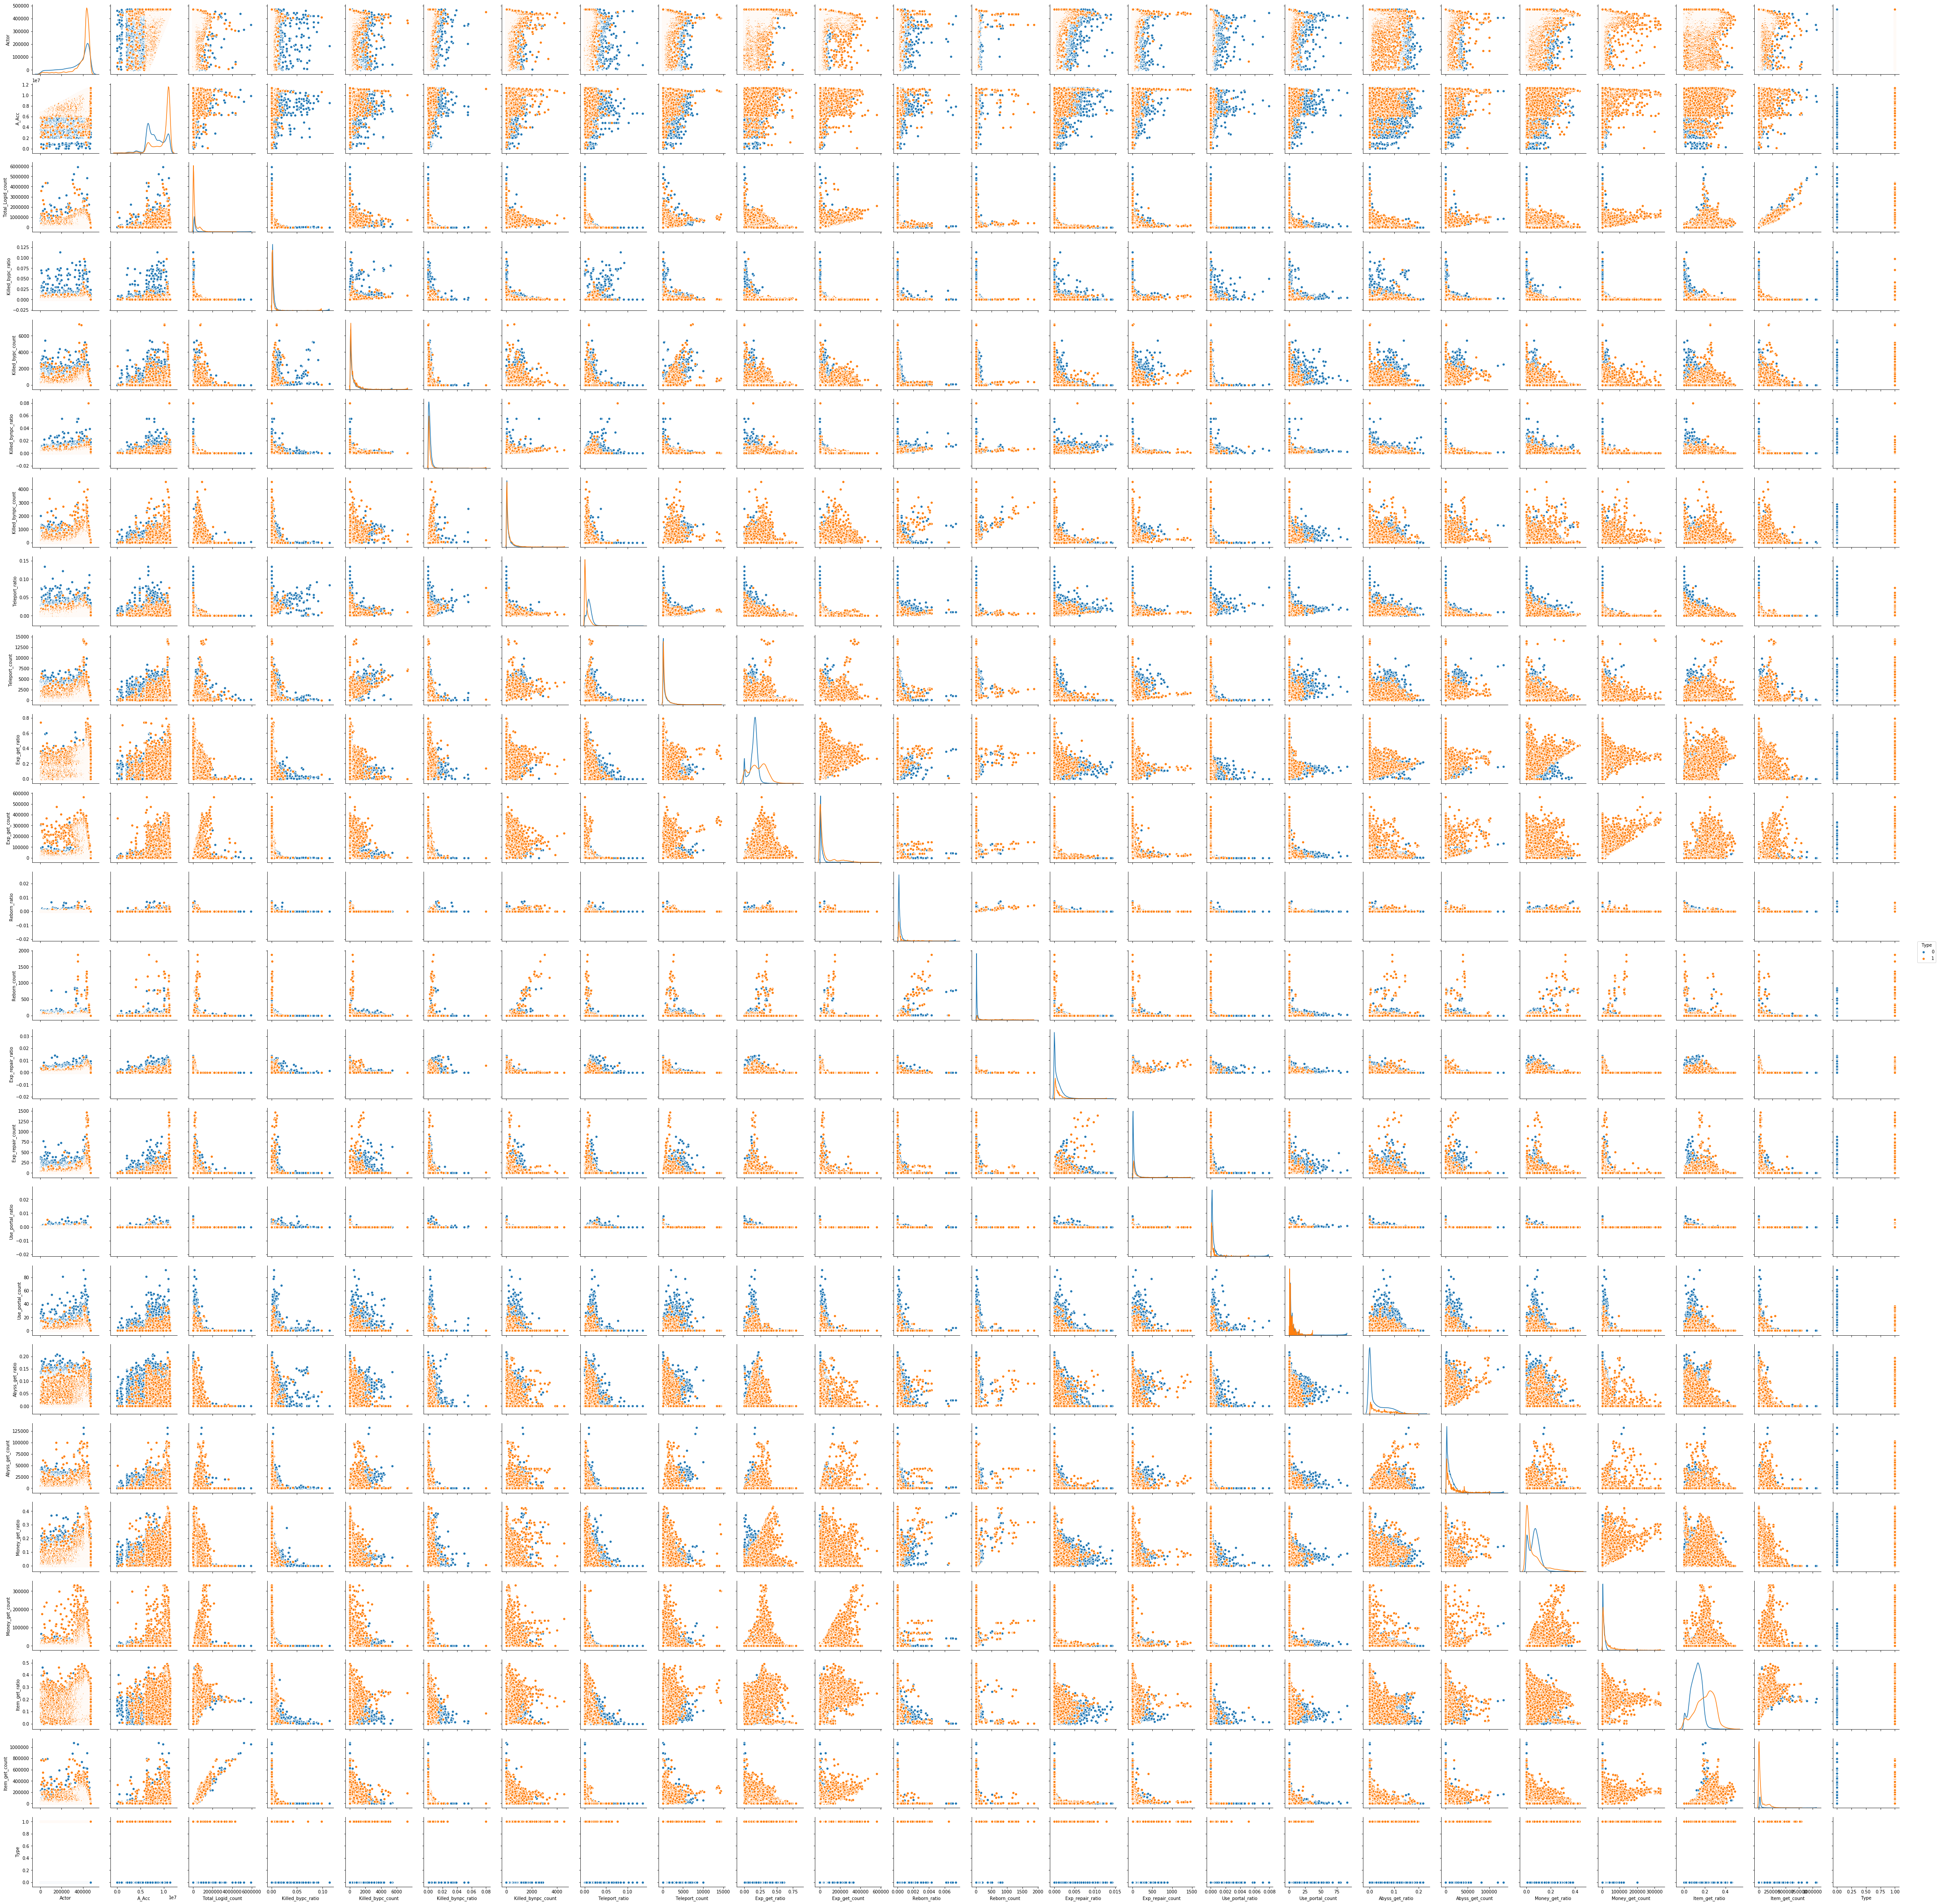

In [10]:
sns.pairplot(PAF_df, hue='Type', diag_kind="kde")

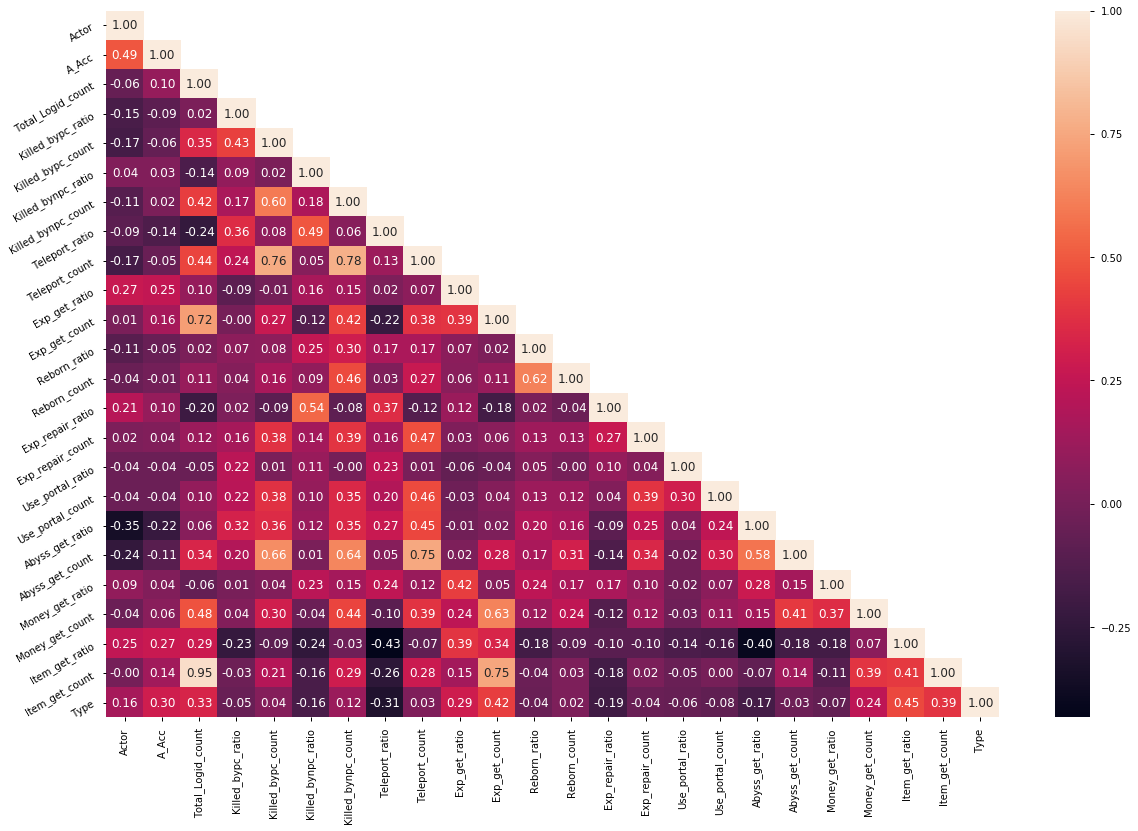

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = PAF_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,13))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Before Applying log transforming the dataset

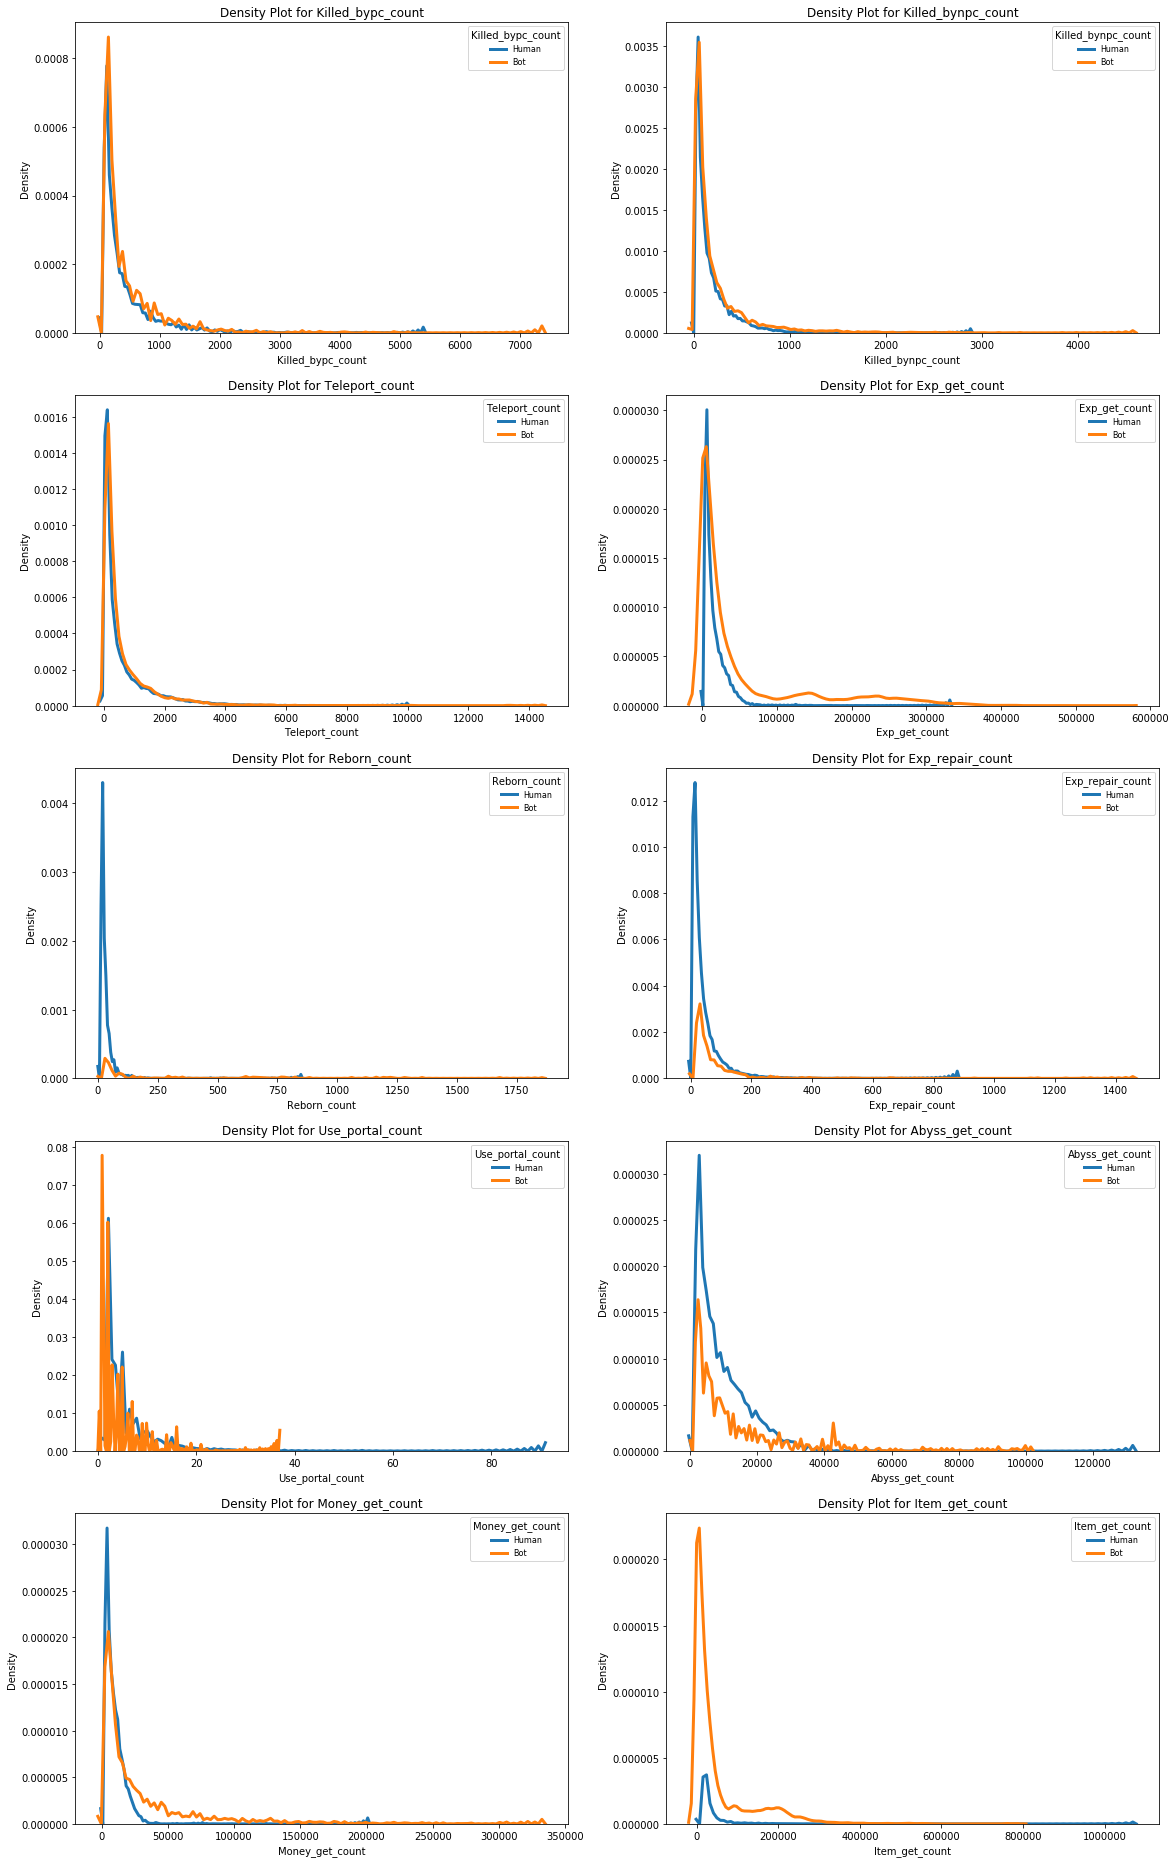

In [10]:
grid_spec = plt.GridSpec(nrows=6, ncols=3, wspace=0.2, hspace=0.2)

cols_to_view = [
    'Killed_bypc_count','Killed_bynpc_count','Teleport_count','Exp_get_count','Reborn_count','Exp_repair_count',
'Use_portal_count','Abyss_get_count','Money_get_count','Item_get_count']

cols_to_view_arr = np.array(cols_to_view)
cols_to_view_arr = np.squeeze(cols_to_view_arr)
cols_to_view_matrix = cols_to_view_arr.reshape(5, 2)
#print(cols_to_view_matrix)

plt.figure(figsize=(30,40))
for x in range(5):
    for y in range(2):
        col = cols_to_view_matrix[x, y]
        plt.subplot(grid_spec[x, y])
        for player_type in [0, 1]:
            subset = PAF_df[PAF_df.Type == player_type]
            sns.distplot(subset[col], hist=False, kde=True,
                         kde_kws={'linewidth': 3},label=type_dict.get(player_type))
        # Plot formatting
        plt.legend(prop={'size': 8}, title = col)
        plt.title('Density Plot for %s' % col)
        plt.xlabel(col)
        plt.ylabel('Density')

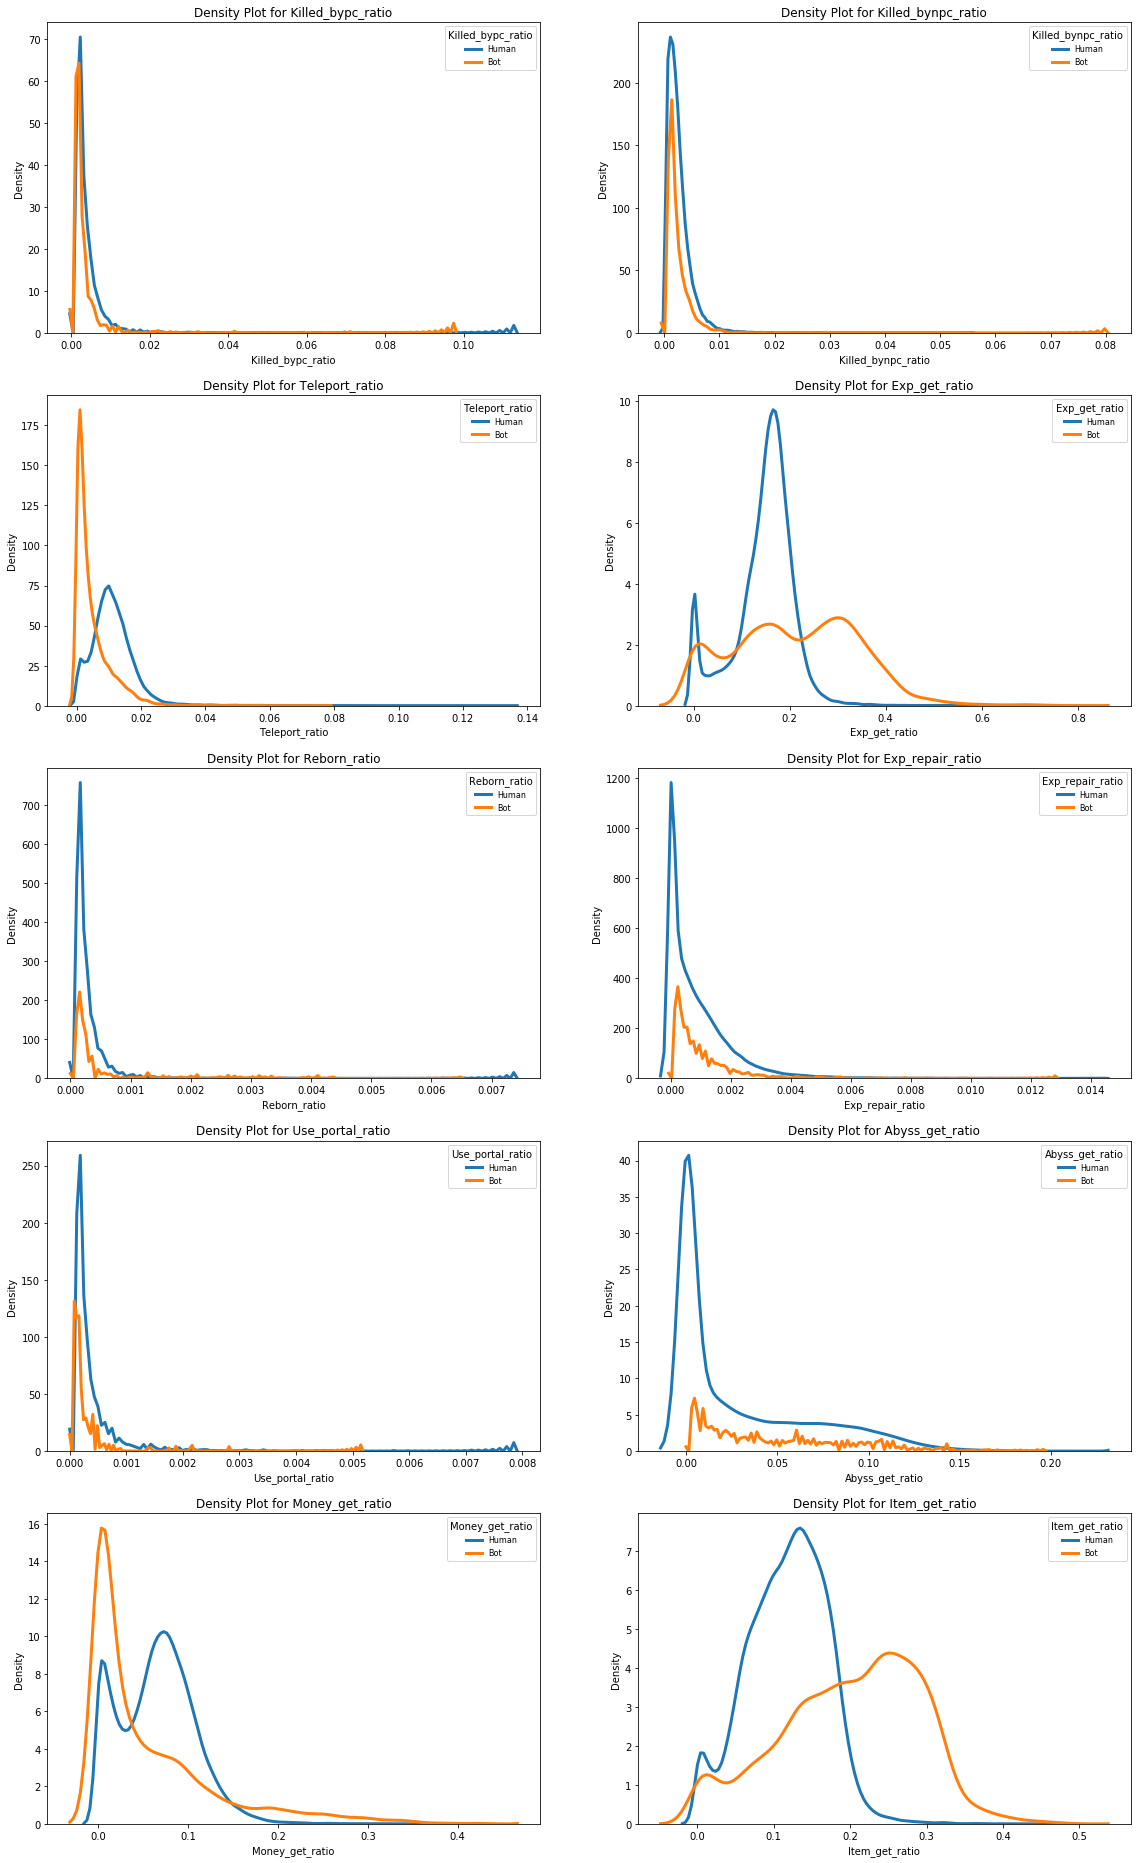

In [11]:
grid_spec = plt.GridSpec(nrows=6, ncols=3, wspace=0.2, hspace=0.2)

cols1_to_view = [
    'Killed_bypc_ratio','Killed_bynpc_ratio','Teleport_ratio','Exp_get_ratio','Reborn_ratio','Exp_repair_ratio',
'Use_portal_ratio','Abyss_get_ratio','Money_get_ratio','Item_get_ratio']

cols1_to_view_arr = np.array(cols1_to_view)
cols1_to_view_arr = np.squeeze(cols1_to_view_arr)
cols1_to_view_matrix = cols1_to_view_arr.reshape(5, 2)
#print(cols_to_view_matrix)

plt.figure(figsize=(30,40))
for x in range(5):
    for y in range(2):
        col1 = cols1_to_view_matrix[x, y]
        plt.subplot(grid_spec[x, y])
        for player_type in [0, 1]:
            subset = PAF_df[PAF_df.Type == player_type]
            sns.distplot(subset[col1], hist=False, kde=True,
                         kde_kws={'linewidth': 3},label=type_dict.get(player_type))
        # Plot formatting
        plt.legend(prop={'size': 8}, title = col1)
        plt.title('Density Plot for %s' % col1)
        plt.xlabel(col1)
        plt.ylabel('Density')

In [12]:
cols_to_model = ['Killed_bypc_count','Killed_bynpc_count','Teleport_count','Exp_get_count','Reborn_count','Exp_repair_count',
'Use_portal_count','Abyss_get_count','Money_get_count','Item_get_count', 'Killed_bypc_ratio','Killed_bynpc_ratio','Teleport_ratio','Exp_get_ratio','Reborn_ratio','Exp_repair_ratio',
'Use_portal_ratio','Abyss_get_ratio','Money_get_ratio','Item_get_ratio']

X_cols = cols_to_model
y_col = ['Type']
X = PAF_df[X_cols]
y = PAF_df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [13]:
results = []
model_names = []
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
auc_metrics = []
for model_name, model in models:
    print("Running model %s" % model_name)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    print("Model score %s" % score)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test, y_predict))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
    print("Classification Report: ")
    print(classification_report(y_test, y_predict, [0, 1]))
    fpr, tpr, threshold = roc_curve(y_test, y_predict)
    roc_auc = auc(fpr, tpr)
    print("AUC %s" % roc_auc)
    auc_metrics.append((model_name, fpr, tpr, roc_auc))
    print("-------------------------------------------------")

Running model LR


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model score 0.9000403334229632
Confusion Matrix: 
[[12435   111]
 [ 1376   954]]
Overall precision of LR: 0.895774647887324
Overall recall of LR: 0.4094420600858369
Overall F1 Score of LR: 0.5620029455081001
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12546
           1       0.90      0.41      0.56      2330

   micro avg       0.90      0.90      0.90     14876
   macro avg       0.90      0.70      0.75     14876
weighted avg       0.90      0.90      0.88     14876

AUC 0.7002973093351231
-------------------------------------------------
Running model LDA
Model score 0.9096531325625168
Confusion Matrix: 
[[12439   107]
 [ 1237  1093]]
Overall precision of LDA: 0.9108333333333334
Overall recall of LDA: 0.46909871244635193
Overall F1 Score of LDA: 0.6192634560906516
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     12546
    

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


Model score 0.9159720354934122
Confusion Matrix: 
[[12243   303]
 [  947  1383]]
Overall precision of KNN: 0.8202846975088968
Overall recall of KNN: 0.5935622317596566
Overall F1 Score of KNN: 0.6887450199203187
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     12546
           1       0.82      0.59      0.69      2330

   micro avg       0.92      0.92      0.92     14876
   macro avg       0.87      0.78      0.82     14876
weighted avg       0.91      0.92      0.91     14876

AUC 0.7847055539477384
-------------------------------------------------
Running model CART
Model score 0.8831002957784351
Confusion Matrix: 
[[11619   927]
 [  812  1518]]
Overall precision of CART: 0.6208588957055214
Overall recall of CART: 0.6515021459227468
Overall F1 Score of CART: 0.6358115183246072
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     125

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC 0.618209350106629
-------------------------------------------------
Running model SVM
Model score 0.8433718741597204
Confusion Matrix: 
[[12541     5]
 [ 2325     5]]
Overall precision of SVM: 0.5
Overall recall of SVM: 0.002145922746781116
Overall F1 Score of SVM: 0.004273504273504273
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      1.00      0.92     12546
           1       0.50      0.00      0.00      2330

   micro avg       0.84      0.84      0.84     14876
   macro avg       0.67      0.50      0.46     14876
weighted avg       0.79      0.84      0.77     14876

AUC 0.5008736946748412
-------------------------------------------------


# These features are having distributions having a very long tail. So we make a log transformation to get the data into normal distribution, so that the model that we build making use of these features works better.¶

# Apply log function to count field and Zscore to ratio field

In [14]:
#Apply log function to all the count coloumn of player action: but where the value is zero , 
# for example Killed_bypc_count in row 3, is having a value , if we apply log transaformation for Zero,
#then log 0 will be infiniti so replace with min,mean or max
    

#Apply log function to count field

In [15]:
cols_to_log_transform =['Killed_bypc_count','Killed_bynpc_count','Teleport_count','Exp_get_count','Reborn_count','Exp_repair_count',
'Use_portal_count','Abyss_get_count','Money_get_count','Item_get_count']
PAF_df.head()

Actor    A_Acc  Total_Logid_count  Killed_bypc_ratio  Killed_bypc_count  \
0   1047  6482393              97030           0.007111                690   
1   1049  6275719               3964           0.007568                 30   
2   1120  6596993               3809           0.000000                  0   
3   1164  6670686               3496           0.007437                 26   
4   1184  4220231               5039           0.001191                  6   

   Killed_bynpc_ratio  Killed_bynpc_count  Teleport_ratio  Teleport_count  \
0            0.001773                 172        0.010832            1051   
1            0.004036                  16        0.029768             118   
2            0.005251                  20        0.009714              37   
3            0.001716                   6        0.017449              61   
4            0.003374                  17        0.010716              54   

   Exp_get_ratio  ...   Exp_repair_count  Use_portal_ratio  Use_portal_count  \
0       0.155210  ...                 66          0.000021                 2   
1       0.136226  ...                  3          0.000505                 2   
2       0.156734  ...                 15          0.000000                 0   
3       0.178776  ...                  0          0.000000                 0   
4       0.180194  ...                  3          0.000000                 0   

   Abyss_get_ratio  Abyss_get_count  Money_get_ratio  Money_get_count  \
0         0.110636            10735         0.102010             9898   
1         0.028507              113         0.075429              299   
2         0.000000                0         0.097926              373   
3         0.080950              283         0.135584              474   
4         0.012502               63         0.092876              468   

   Item_get_ratio  Item_get_count  Type  
0        0.062847            6098     0  
1        0.069122             274     0  
2        0.135994             518     0  
3        0.068650             240     0  
4        0.080572             406     0  

[5 rows x 24 columns]

In [16]:
#Apply log function to all the count coloumn of player action: but where the value is zero , 
# for example Killed_bypc_count in row 3, is having a value , if we apply log transaformation for Zero, then log 0 will be infiniti
    
#PAF_df.Killed_bypc_count= PAF_df.Killed_bypc_count.apply(np.log)
#PAF_df.Killed_bynpc_count= PAF_df.Killed_bynpc_count.apply(np.log)
#PAF_df.Teleport_count= PAF_df.Teleport_count.apply(np.log)

for col in cols_to_log_transform:
    PAF_df[col] = PAF_df[col].apply(np.log).apply(np.log)
    tmp = PAF_df[col].copy()
    negative_inf_indices = tmp[tmp == -np.inf].index
    tmp.drop(negative_inf_indices, inplace=True)

# replace if the the value is infinite with min, median or max value
    PAF_df[col].replace(to_replace=-np.inf, value=tmp.min(), inplace=True)
    PAF_df[col].replace(to_replace=np.nan, value=tmp.median(), inplace=True)
    PAF_df[col].replace(to_replace=np.inf, value=tmp.max(), inplace=True)


In [17]:
PAF_df.head()

Actor    A_Acc  Total_Logid_count  Killed_bypc_ratio  Killed_bypc_count  \
0   1047  6482393              97030           0.007111           1.877431   
1   1049  6275719               3964           0.007568           1.224128   
2   1120  6596993               3809           0.000000           1.268453   
3   1164  6670686               3496           0.007437           1.181143   
4   1184  4220231               5039           0.001191           0.583198   

   Killed_bynpc_ratio  Killed_bynpc_count  Teleport_ratio  Teleport_count  \
0            0.001773            1.638510        0.010832        1.939820   
1            0.004036            1.019781        0.029768        1.562490   
2            0.005251            1.097189        0.009714        1.283962   
3            0.001716            0.583198        0.017449        1.413636   
4            0.003374            1.041412        0.010716        1.383537   

   Exp_get_ratio  ...   Exp_repair_count  Use_portal_ratio  Use_portal_count  \
0       0.155210  ...           1.432618          0.000021         -0.366513   
1       0.136226  ...           0.094048          0.000505         -0.366513   
2       0.156734  ...           0.996229          0.000000          0.326634   
3       0.178776  ...           0.941939          0.000000          0.326634   
4       0.180194  ...           0.094048          0.000000          0.326634   

   Abyss_get_ratio  Abyss_get_count  Money_get_ratio  Money_get_count  \
0         0.110636         2.227998         0.102010         2.219213   
1         0.028507         1.553373         0.075429         1.740544   
2         0.000000         1.863170         0.097926         1.778603   
3         0.080950         1.730849         0.135584         1.818273   
4         0.012502         1.421453         0.092876         1.816203   

   Item_get_ratio  Item_get_count  Type  
0        0.062847        2.165128     0  
1        0.069122        1.725108     0  
2        0.135994        1.832578     0  
3        0.068650        1.701222     0  
4        0.080572        1.792818     0  

[5 rows x 24 columns]

Text(0,0.5,'Density')

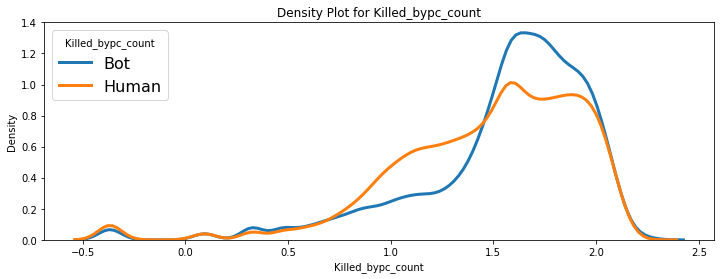

In [18]:
# Draw density plot after the log for one dimenison to see the difference

plot_dims = (12, 4)
fig, axis = plt.subplots(figsize=plot_dims)

#for player_type in ['Human', 'Bot']:
for player_type in [1, 0]:
    subset = PAF_df[PAF_df.Type == player_type]
    sns.distplot(subset['Teleport_count'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=type_dict.get(player_type), ax=axis)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Killed_bypc_count')
plt.title('Density Plot for Killed_bypc_count')
plt.xlabel('Killed_bypc_count')
plt.ylabel('Density')

# Desitny plot after log transformation function on Count field

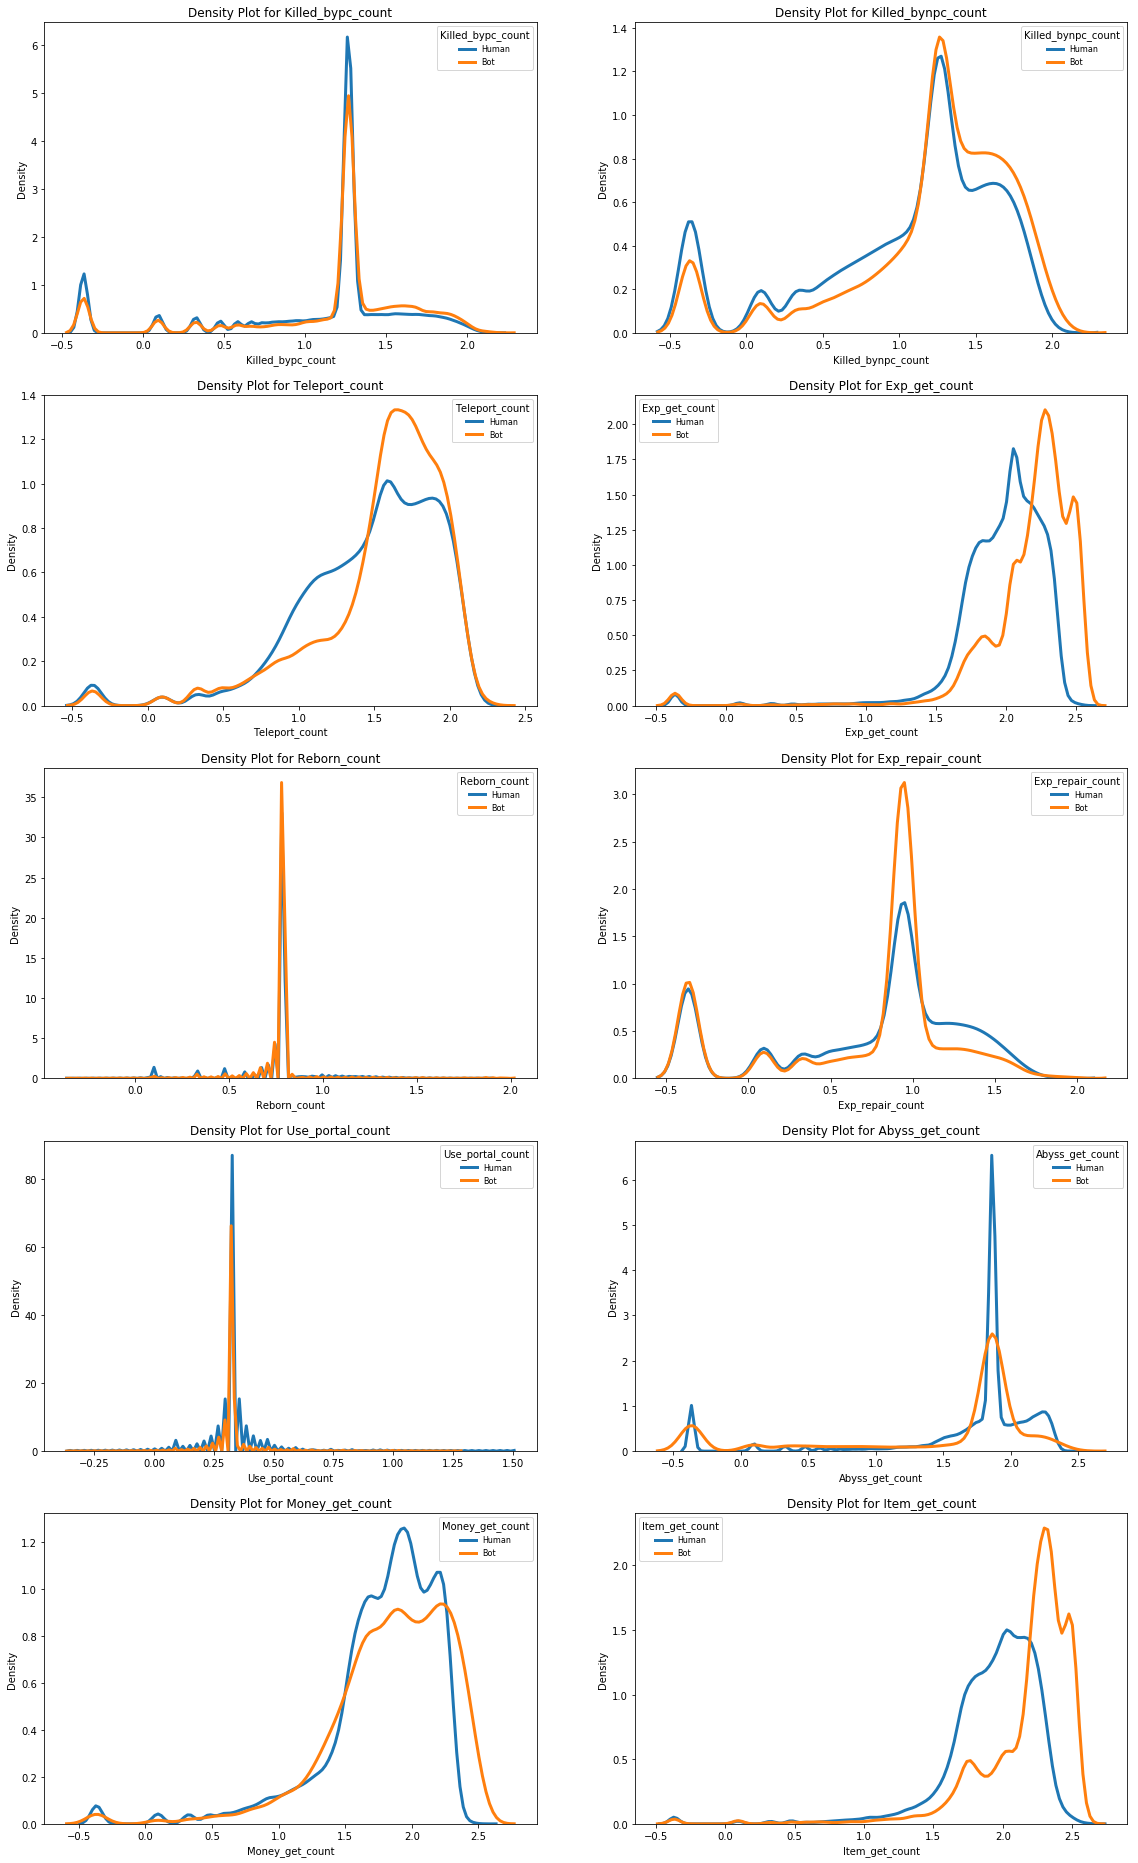

In [19]:
# Desity plot after log transformation function

grid_spec = plt.GridSpec(nrows=6, ncols=3, wspace=0.2, hspace=0.2)

cols_to_view = [
    'Killed_bypc_count','Killed_bynpc_count','Teleport_count','Exp_get_count','Reborn_count','Exp_repair_count',
'Use_portal_count','Abyss_get_count','Money_get_count','Item_get_count']

cols_to_view_arr = np.array(cols_to_view)
cols_to_view_arr = np.squeeze(cols_to_view_arr)
cols_to_view_matrix = cols_to_view_arr.reshape(5, 2)
#print(cols_to_view_matrix)

plt.figure(figsize=(30,40))
for x in range(5):
    for y in range(2):
        col = cols_to_view_matrix[x, y]
        plt.subplot(grid_spec[x, y])
        for player_type in [0, 1]:
            subset = PAF_df[PAF_df.Type == player_type]
            sns.distplot(subset[col], hist=False, kde=True,
                         kde_kws={'linewidth': 3},label=type_dict.get(player_type))
        # Plot formatting
        plt.legend(prop={'size': 8}, title = col)
        plt.title('Density Plot for %s' % col)
        plt.xlabel(col)
        plt.ylabel('Density')

# Apply zscore function to ratio field

In [20]:
cols_to_zscore =['Killed_bypc_ratio','Killed_bynpc_ratio','Teleport_ratio','Exp_get_ratio','Reborn_ratio','Exp_repair_ratio',
'Use_portal_ratio','Abyss_get_ratio','Money_get_ratio','Item_get_ratio']
PAF_df.head()

Actor    A_Acc  Total_Logid_count  Killed_bypc_ratio  Killed_bypc_count  \
0   1047  6482393              97030           0.007111           1.877431   
1   1049  6275719               3964           0.007568           1.224128   
2   1120  6596993               3809           0.000000           1.268453   
3   1164  6670686               3496           0.007437           1.181143   
4   1184  4220231               5039           0.001191           0.583198   

   Killed_bynpc_ratio  Killed_bynpc_count  Teleport_ratio  Teleport_count  \
0            0.001773            1.638510        0.010832        1.939820   
1            0.004036            1.019781        0.029768        1.562490   
2            0.005251            1.097189        0.009714        1.283962   
3            0.001716            0.583198        0.017449        1.413636   
4            0.003374            1.041412        0.010716        1.383537   

   Exp_get_ratio  ...   Exp_repair_count  Use_portal_ratio  Use_portal_count  \
0       0.155210  ...           1.432618          0.000021         -0.366513   
1       0.136226  ...           0.094048          0.000505         -0.366513   
2       0.156734  ...           0.996229          0.000000          0.326634   
3       0.178776  ...           0.941939          0.000000          0.326634   
4       0.180194  ...           0.094048          0.000000          0.326634   

   Abyss_get_ratio  Abyss_get_count  Money_get_ratio  Money_get_count  \
0         0.110636         2.227998         0.102010         2.219213   
1         0.028507         1.553373         0.075429         1.740544   
2         0.000000         1.863170         0.097926         1.778603   
3         0.080950         1.730849         0.135584         1.818273   
4         0.012502         1.421453         0.092876         1.816203   

   Item_get_ratio  Item_get_count  Type  
0        0.062847        2.165128     0  
1        0.069122        1.725108     0  
2        0.135994        1.832578     0  
3        0.068650        1.701222     0  
4        0.080572        1.792818     0  

[5 rows x 24 columns]

In [21]:
#df[['a','c']] = df[['a','c']].apply(zscore)

PAF_df[cols_to_zscore]= PAF_df[cols_to_zscore].apply(zscore)

PAF_df.head()

Actor    A_Acc  Total_Logid_count  Killed_bypc_ratio  Killed_bypc_count  \
0   1047  6482393              97030           1.907280           1.877431   
1   1049  6275719               3964           2.052172           1.224128   
2   1120  6596993               3809          -0.347779           1.268453   
3   1164  6670686               3496           2.010617           1.181143   
4   1184  4220231               5039           0.029812           0.583198   

   Killed_bynpc_ratio  Killed_bynpc_count  Teleport_ratio  Teleport_count  \
0           -0.097877            1.638510        0.150822        1.939820   
1            0.896329            1.019781        2.885007        1.562490   
2            1.429690            1.097189       -0.010585        1.283962   
3           -0.122648            0.583198        1.106219        1.413636   
4            0.605297            1.041412        0.134176        1.383537   

   Exp_get_ratio  ...   Exp_repair_count  Use_portal_ratio  Use_portal_count  \
0      -0.017756  ...           1.432618         -0.057824         -0.366513   
1      -0.254873  ...           0.094048          3.066156         -0.366513   
2       0.001284  ...           0.996229         -0.190885          0.326634   
3       0.276597  ...           0.941939         -0.190885          0.326634   
4       0.294318  ...           0.094048         -0.190885          0.326634   

   Abyss_get_ratio  Abyss_get_count  Money_get_ratio  Money_get_count  \
0         2.307347         2.227998         0.792584         2.219213   
1         0.082599         1.553373         0.238432         1.740544   
2        -0.689597         1.863170         0.707448         1.778603   
3         1.503196         1.730849         1.492527         1.818273   
4        -0.350925         1.421453         0.602158         1.816203   

   Item_get_ratio  Item_get_count  Type  
0       -1.023888        2.165128     0  
1       -0.929137        1.725108     0  
2        0.080516        1.832578     0  
3       -0.936267        1.701222     0  
4       -0.756269        1.792818     0  

[5 rows x 24 columns]

#Density plot after Zscore to normalize RATIO field

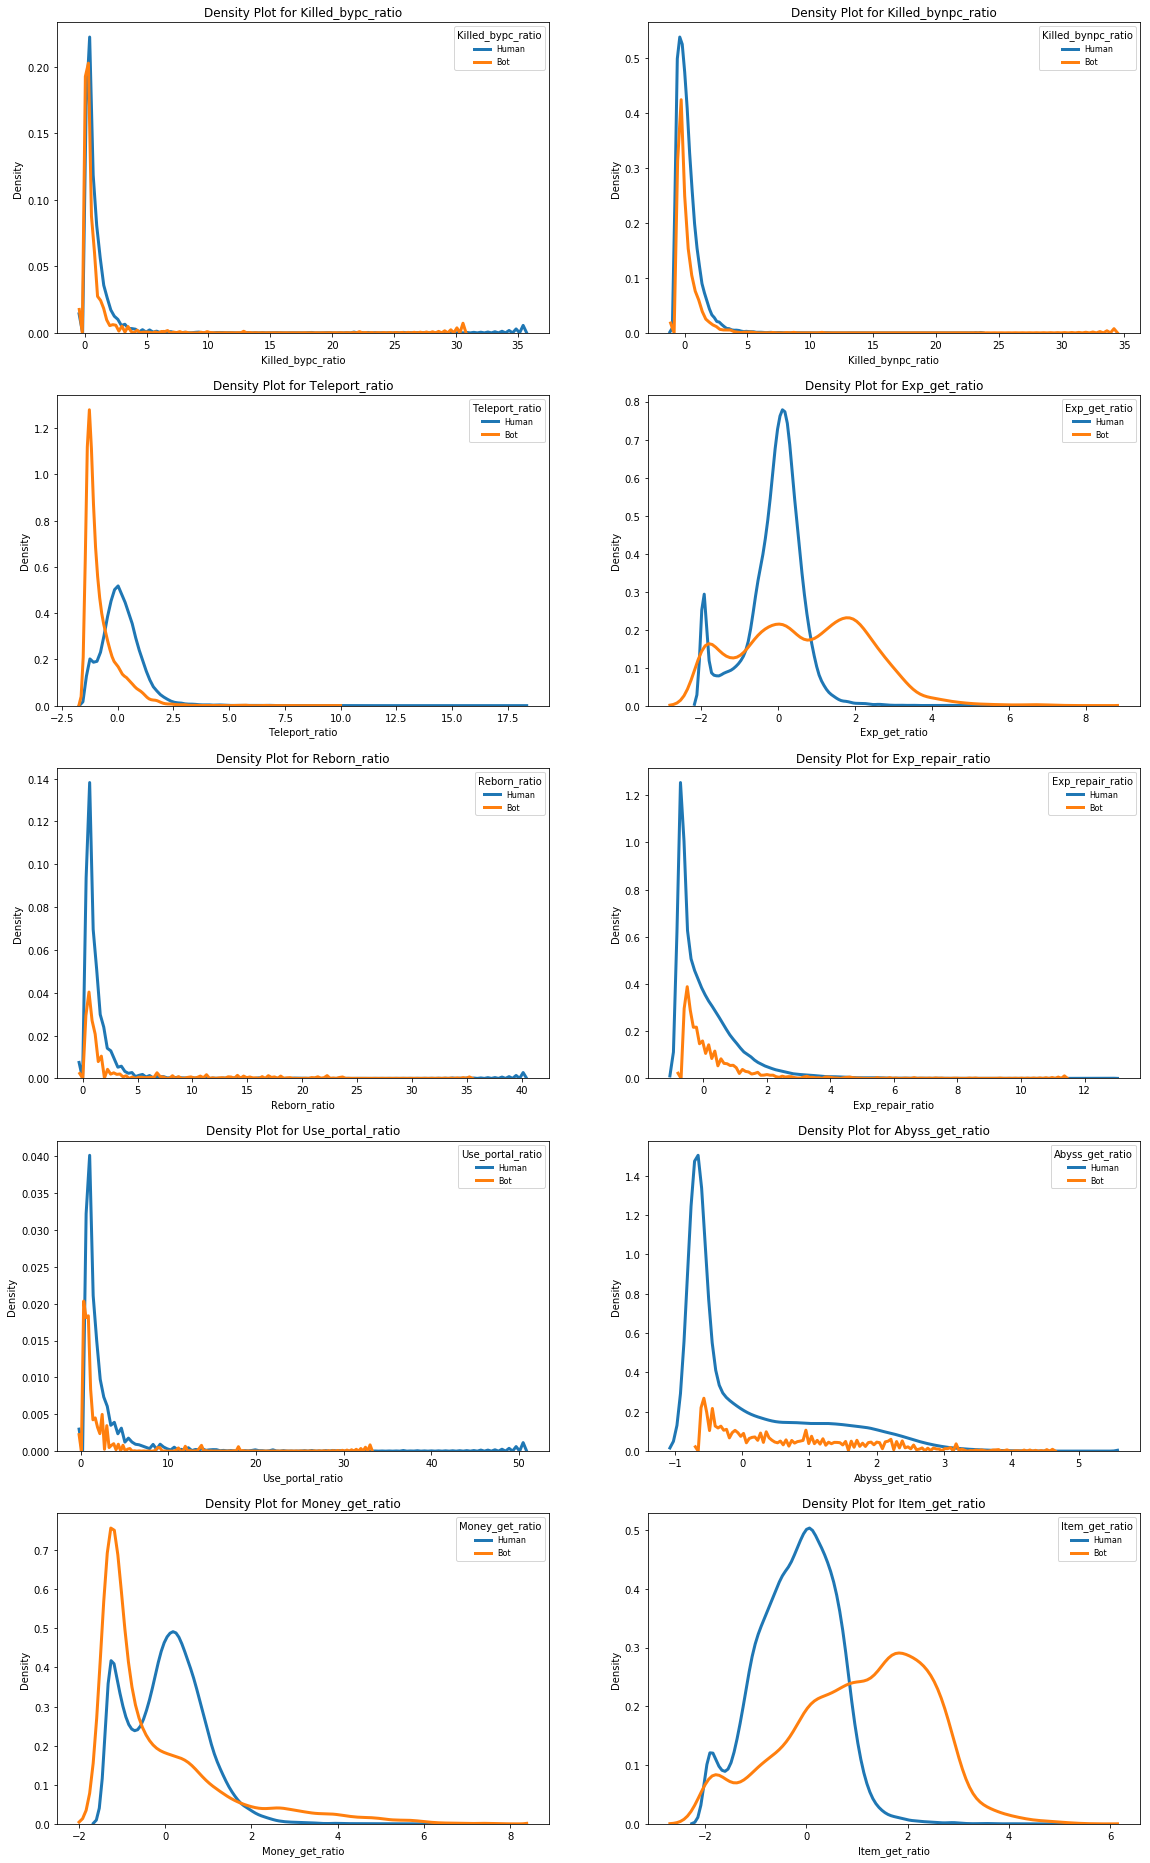

In [22]:
grid_spec = plt.GridSpec(nrows=6, ncols=3, wspace=0.2, hspace=0.2)

cols1_to_view = [
    'Killed_bypc_ratio','Killed_bynpc_ratio','Teleport_ratio','Exp_get_ratio','Reborn_ratio','Exp_repair_ratio',
'Use_portal_ratio','Abyss_get_ratio','Money_get_ratio','Item_get_ratio']

cols1_to_view_arr = np.array(cols1_to_view)
cols1_to_view_arr = np.squeeze(cols1_to_view_arr)
cols1_to_view_matrix = cols1_to_view_arr.reshape(5, 2)
#print(cols_to_view_matrix)

plt.figure(figsize=(30,40))
for x in range(5):
    for y in range(2):
        col1 = cols1_to_view_matrix[x, y]
        plt.subplot(grid_spec[x, y])
        for player_type in [0, 1]:
            subset = PAF_df[PAF_df.Type == player_type]
            sns.distplot(subset[col1], hist=False, kde=True,
                         kde_kws={'linewidth': 3},label=type_dict.get(player_type))
        # Plot formatting
        plt.legend(prop={'size': 8}, title = col1)
        plt.title('Density Plot for %s' % col1)
        plt.xlabel(col1)
        plt.ylabel('Density')

In [23]:
PAF_df_scaled = PAF_df.copy()

In [24]:
# PAF_df=PAF_df_scaled.copy()

In [25]:
PAF_df_scaled.head(5)

Actor    A_Acc  Total_Logid_count  Killed_bypc_ratio  Killed_bypc_count  \
0   1047  6482393              97030           1.907280           1.877431   
1   1049  6275719               3964           2.052172           1.224128   
2   1120  6596993               3809          -0.347779           1.268453   
3   1164  6670686               3496           2.010617           1.181143   
4   1184  4220231               5039           0.029812           0.583198   

   Killed_bynpc_ratio  Killed_bynpc_count  Teleport_ratio  Teleport_count  \
0           -0.097877            1.638510        0.150822        1.939820   
1            0.896329            1.019781        2.885007        1.562490   
2            1.429690            1.097189       -0.010585        1.283962   
3           -0.122648            0.583198        1.106219        1.413636   
4            0.605297            1.041412        0.134176        1.383537   

   Exp_get_ratio  ...   Exp_repair_count  Use_portal_ratio  Use_portal_count  \
0      -0.017756  ...           1.432618         -0.057824         -0.366513   
1      -0.254873  ...           0.094048          3.066156         -0.366513   
2       0.001284  ...           0.996229         -0.190885          0.326634   
3       0.276597  ...           0.941939         -0.190885          0.326634   
4       0.294318  ...           0.094048         -0.190885          0.326634   

   Abyss_get_ratio  Abyss_get_count  Money_get_ratio  Money_get_count  \
0         2.307347         2.227998         0.792584         2.219213   
1         0.082599         1.553373         0.238432         1.740544   
2        -0.689597         1.863170         0.707448         1.778603   
3         1.503196         1.730849         1.492527         1.818273   
4        -0.350925         1.421453         0.602158         1.816203   

   Item_get_ratio  Item_get_count  Type  
0       -1.023888        2.165128     0  
1       -0.929137        1.725108     0  
2        0.080516        1.832578     0  
3       -0.936267        1.701222     0  
4       -0.756269        1.792818     0  

[5 rows x 24 columns]

# Model Building

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, roc_curve, f1_score, classification_report

In [27]:
cols_to_model = ['Killed_bypc_count','Killed_bynpc_count','Teleport_count','Exp_get_count','Reborn_count','Exp_repair_count',
'Use_portal_count','Abyss_get_count','Money_get_count','Item_get_count', 'Killed_bypc_ratio','Killed_bynpc_ratio','Teleport_ratio','Exp_get_ratio','Reborn_ratio','Exp_repair_ratio',
'Use_portal_ratio','Abyss_get_ratio','Money_get_ratio','Item_get_ratio']

In [28]:
X_cols = cols_to_model
y_col = ['Type']
X = PAF_df_scaled[X_cols]
y = PAF_df_scaled[y_col]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
#
log_reg_model =LogisticRegression()
log_reg_model.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
y_predict = log_reg_model.predict(X_test)

In [31]:
log_reg_score = log_reg_model.score(X_test, y_test)
print(log_reg_score)

0.9219548265662812


In [32]:
print("Overall precision of Logistic Regression: %s" % precision_score(y_test, y_predict))
print("Overall recall of Logistic Regression: %s" % recall_score(y_test, y_predict))
print("Overall F1 Score of Logistic Regression: %s" % f1_score(y_test, y_predict))

Overall precision of Logistic Regression: 0.9177984274481773
Overall recall of Logistic Regression: 0.5510729613733906
Overall F1 Score of Logistic Regression: 0.6886564762670958


In [33]:
print(classification_report(y_test, y_predict, [0,1]))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     12546
           1       0.92      0.55      0.69      2330

   micro avg       0.92      0.92      0.92     14876
   macro avg       0.92      0.77      0.82     14876
weighted avg       0.92      0.92      0.91     14876



20.00040336405624
20


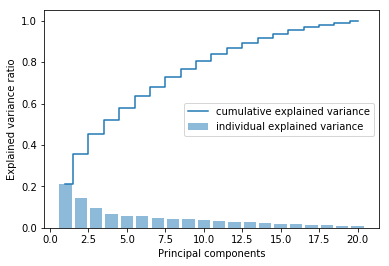

In [34]:
X_cols = cols_to_model
y_col = ['Type']
X = PAF_df_scaled[X_cols]
y = PAF_df_scaled[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

sc = StandardScaler()
X_std = sc.fit_transform(X)
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
tot = sum(eigenvalues)
print(tot)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
print(len(eigenvalues))
plt.bar(range(1,21), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,21),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Running against different models

In [35]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [36]:
# Get all the models in a list
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Tree", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
#models.append(("SVC", SVC()))

In [37]:
X_cols = cols_to_model
y_col = ['Type']
X = PAF_df_scaled[X_cols]
y = PAF_df_scaled[y_col]


In [38]:
results = []
model_names = []
for model_name, model in models:
    kfold_cv = model_selection.KFold(n_splits=10, random_state=23)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold_cv, scoring='accuracy')
    #print(model_name, cv_results)
    results.append(cv_results)
    model_names.append(model_name)
    msg = "%s: %f (%f)" % (model_name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\li

LR: 0.921546 (0.020914)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

LDA: 0.918984 (0.019759)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vect

KNN: 0.929573 (0.011393)
Tree: 0.878489 (0.013762)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

NB: 0.830694 (0.032531)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
print(results)

[array([0.94696511, 0.94978826, 0.94555354, 0.92760637, 0.91448165,
       0.90701896, 0.87918516, 0.91327148, 0.90782574, 0.92375958]), array([0.94273039, 0.94716677, 0.9405122 , 0.92337165, 0.91044776,
       0.90540541, 0.87817668, 0.9126664 , 0.9090359 , 0.92033078]), array([0.9461585 , 0.94273039, 0.94273039, 0.92700141, 0.91750706,
       0.90863251, 0.92194433, 0.93202904, 0.93162566, 0.92537313]), array([0.87961283, 0.8836459 , 0.88324259, 0.86791692, 0.86405809,
       0.84993949, 0.87575635, 0.895119  , 0.89007664, 0.89552239]), array([0.7816092 , 0.78624723, 0.81548699, 0.82375479, 0.84126664,
       0.82613957, 0.88180718, 0.85982251, 0.87615974, 0.814643  ])]


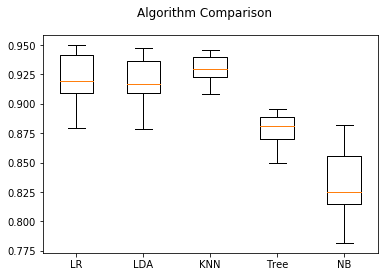

In [40]:
# Plotting the results of cross validation in box plot to check the variation of cross validation scores of each algo.
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()

# From the above, it seems that LR is giving the best results. Its mean CV score is higher than others and
# it also has more compact box plots, which means that there is not much variation in results.


In [41]:
X_cols = cols_to_model
y_col = ['Type']
X = PAF_df_scaled[X_cols]
y = PAF_df_scaled[y_col]


In [42]:
results = []
model_names = []
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
auc_metrics = []
for model_name, model in models:
    print("Running model %s" % model_name)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    print("Model score %s" % score)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test, y_predict))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
    print("Classification Report: ")
    print(classification_report(y_test, y_predict, [0, 1]))
    fpr, tpr, threshold = roc_curve(y_test, y_predict)
    roc_auc = auc(fpr, tpr)
    print("AUC %s" % roc_auc)
    auc_metrics.append((model_name, fpr, tpr, roc_auc))
    

Running model LR


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model score 0.9219548265662812
Confusion Matrix: 
[[12431   115]
 [ 1046  1284]]
Overall precision of LR: 0.9177984274481773
Overall recall of LR: 0.5510729613733906
Overall F1 Score of LR: 0.6886564762670958
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     12546
           1       0.92      0.55      0.69      2330

   micro avg       0.92      0.92      0.92     14876
   macro avg       0.92      0.77      0.82     14876
weighted avg       0.92      0.92      0.91     14876

AUC 0.7709533466200605
Running model LDA


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model score 0.9184592632428072
Confusion Matrix: 
[[12400   146]
 [ 1067  1263]]
Overall precision of LDA: 0.8963804116394606
Overall recall of LDA: 0.5420600858369099
Overall F1 Score of LDA: 0.6755817063385932
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     12546
           1       0.90      0.54      0.68      2330

   micro avg       0.92      0.92      0.92     14876
   macro avg       0.91      0.77      0.81     14876
weighted avg       0.92      0.92      0.91     14876

AUC 0.7652114553208141
Running model KNN


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


Model score 0.9319709599354665
Confusion Matrix: 
[[12356   190]
 [  822  1508]]
Overall precision of KNN: 0.8881036513545347
Overall recall of KNN: 0.6472103004291846
Overall F1 Score of KNN: 0.7487586891757696
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12546
           1       0.89      0.65      0.75      2330

   micro avg       0.93      0.93      0.93     14876
   macro avg       0.91      0.82      0.85     14876
weighted avg       0.93      0.93      0.93     14876

AUC 0.8160330156697173
Running model CART
Model score 0.8830330734068298
Confusion Matrix: 
[[11609   937]
 [  803  1527]]
Overall precision of CART: 0.619724025974026
Overall recall of CART: 0.6553648068669528
Overall F1 Score of CART: 0.6370463078848562
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     12546
           1       0.62      0.66      0.64     

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AUC 0.7987881505929424
Running model SVM
Model score 0.9315004033342297
Confusion Matrix: 
[[12448    98]
 [  921  1409]]
Overall precision of SVM: 0.9349701393497014
Overall recall of SVM: 0.6047210300429184
Overall F1 Score of SVM: 0.7344279384936149
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     12546
           1       0.93      0.60      0.73      2330

   micro avg       0.93      0.93      0.93     14876
   macro avg       0.93      0.80      0.85     14876
weighted avg       0.93      0.93      0.93     14876

AUC 0.7984548877298921


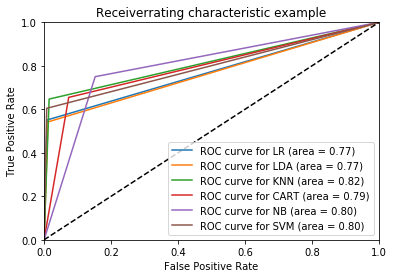

In [43]:
# Plot ROC curve
plt.clf()
for model_name, fpr, tpr, roc_auc in auc_metrics:
    plt.plot(fpr, tpr, label='ROC curve for %s (area = %0.2f)' % (model_name, roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()

# From the above, we get the following analysis

# 1. Linear Discriminant Analysis and Linear Regression performs best. This is due to the fact that the in the dataset, the playtime_per_day has strong correlation with Type column.

# 2. The overall score of both the algo is in the range of 95%. But the recall score of classifying a bot in both cases is close to 66%. This means that for both the algorithms, there was one incorrect prediction of bot as human for every two correct predictions of bots.

# 3. The precision score for bot prediction is close to 83% i.e. out of total bot predictions, both algorithms were correct 83% of time.

# 4. The overall score of algo is high because og high precision and recall score for human players. This is because we have skewed dataset where the ratio between bots and human players is 1:7. So all the algos is trained better for predicting human players.

# 5. None of the classfication algorithms have a recall score for bots better than 69%.

# For SVC

# 1. The model score is low.
# 2. The recall score for bot is just 2%. This means that SVC was able to successfully classify a bot from all bots only 2% of time. This is the worst compared to all algos.
# 3. The recall score for human is close to 100%

In [44]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

base_model = LogisticRegression()
#base_model = LinearDiscriminantAnalysis()
classfiers = [
    ('Bagging Classifier', BaggingClassifier(base_estimator=base_model, n_estimators=50, max_samples=0.7)),
    ('AdaBoost Classifier', AdaBoostClassifier(base_estimator=base_model, n_estimators= 50)),
    ('Gradient Boost Classfier', GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)),
    ('Random Forest Classifier', RandomForestClassifier(n_estimators = 50))
]
for classifier_name, classifier in classfiers:
    print("Running %s" % classifier_name)
    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)
    print(classifier.score(X_test, y_test))
    print(metrics.confusion_matrix(y_test, y_predict))
    print(metrics.classification_report(y_test, y_predict))
    print("-------------------------------------------------")

Running Bagging Classifier


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:618: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver w

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

0.921887604194676
[[12429   117]
 [ 1045  1285]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     12546
           1       0.92      0.55      0.69      2330

   micro avg       0.92      0.92      0.92     14876
   macro avg       0.92      0.77      0.82     14876
weighted avg       0.92      0.92      0.91     14876

-------------------------------------------------
Running AdaBoost Classifier


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver w

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

0.9031997848884109
[[12428   118]
 [ 1322  1008]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     12546
           1       0.90      0.43      0.58      2330

   micro avg       0.90      0.90      0.90     14876
   macro avg       0.90      0.71      0.76     14876
weighted avg       0.90      0.90      0.89     14876

-------------------------------------------------
Running Gradient Boost Classfier


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9265931702070449
[[12423   123]
 [  969  1361]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     12546
           1       0.92      0.58      0.71      2330

   micro avg       0.93      0.93      0.93     14876
   macro avg       0.92      0.79      0.84     14876
weighted avg       0.93      0.93      0.92     14876

-------------------------------------------------
Running Random Forest Classifier


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.9364076364614143
[[12398   148]
 [  798  1532]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12546
           1       0.91      0.66      0.76      2330

   micro avg       0.94      0.94      0.94     14876
   macro avg       0.93      0.82      0.86     14876
weighted avg       0.94      0.94      0.93     14876

-------------------------------------------------


# From the above, it seems that Boosting techniques are not able to increase the recall score for Bots.

In [46]:
X_cols = cols_to_model
y_col = ['Type']
X = PAF_df_scaled[X_cols]
y = PAF_df_scaled[y_col]

# Use SMOTE,ClusterCentroids, RandomOverSampler, RandomUnderSampler for upsampling

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print(type(y_train))

model = KNeighborsClassifier(n_neighbors=10)
model_name = 'KNN'
auc_metrics = []

# Running KNN after Resampling the data using SMOTE
from imblearn.over_sampling import SMOTE


print("Before UpSampling, counts of label 1: %d" % (sum(y_train.values==1)))
print("Before UpSampling, counts of label 0: %d" % (sum(y_train.values==0)))
sm = SMOTE(sampling_strategy = 1, k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train)
#X_train_resample, y_train_resample = cc.fit_sample(X_train, y_train)
print("After UpSampling, counts of label '1': %s" % (sum(y_train_resample==1)))
print("After UpSampling, counts of label '0': %s" % (sum(y_train_resample==0)))
#print("After UpSampling, the shape of train_X: %s" % (X_train_resample.shape))
#print("After UpSampling, the shape of train_y: %s" % (y_train_resample.shape))

model.fit(X_train_resample, y_train_resample)
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print("Model score %s" % score)
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_predict))
print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
print("Classification Report: ")
print(classification_report(y_test, y_predict, [0, 1]))
fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
print("AUC %s" % roc_auc)
auc_metrics.append((model_name, fpr, tpr, roc_auc))
print("-------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
Before UpSampling, counts of label 1: 5362
Before UpSampling, counts of label 0: 29346


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After UpSampling, counts of label '1': 29346
After UpSampling, counts of label '0': 29346
Model score 0.8501613336918526
Confusion Matrix: 
[[10892  1654]
 [  575  1755]]
Overall precision of KNN: 0.5148137283660897
Overall recall of KNN: 0.7532188841201717
Overall F1 Score of KNN: 0.6116048092002091
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     12546
           1       0.51      0.75      0.61      2330

   micro avg       0.85      0.85      0.85     14876
   macro avg       0.73      0.81      0.76     14876
weighted avg       0.88      0.85      0.86     14876

AUC 0.8106920181799646
-------------------------------------------------


In [48]:
X = PAF_df_scaled[X_cols]
y = PAF_df_scaled[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print(type(y_train))

model = KNeighborsClassifier(n_neighbors=10)
model_name = 'KNN'
auc_metrics = []

# Running KNN after Resampling DOWN SAMPLING the data using ClusterCentroids

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()  

print("Before DownSampling, counts of label 1: %d" % (sum(y_train.values==1)))
print("Before DownSampling, counts of label 0: %d" % (sum(y_train.values==0)))
#sm = SMOTE(sampling_strategy = 1, k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
#X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train)
X_train_resample, y_train_resample = cc.fit_sample(X_train, y_train)
print("After DownSampling, counts of label '1': %s" % (sum(y_train_resample==1)))
print("After DownSampling, counts of label '0': %s" % (sum(y_train_resample==0)))
#print("After UpSampling, the shape of train_X: %s" % (X_train_resample.shape))
#print("After UpSampling, the shape of train_y: %s" % (y_train_resample.shape))

model.fit(X_train_resample, y_train_resample)
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print("Model score %s" % score)
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_predict))
print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
print("Classification Report: ")
print(classification_report(y_test, y_predict, [0, 1]))
fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
print("AUC %s" % roc_auc)
auc_metrics.append((model_name, fpr, tpr, roc_auc))
print("-------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
Before DownSampling, counts of label 1: 5362
Before DownSampling, counts of label 0: 29346


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After DownSampling, counts of label '1': 5362
After DownSampling, counts of label '0': 5362
Model score 0.860446356547459
Confusion Matrix: 
[[11002  1544]
 [  532  1798]]
Overall precision of KNN: 0.538001196888091
Overall recall of KNN: 0.7716738197424893
Overall F1 Score of KNN: 0.6339915373765868
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     12546
           1       0.54      0.77      0.63      2330

   micro avg       0.86      0.86      0.86     14876
   macro avg       0.75      0.82      0.77     14876
weighted avg       0.89      0.86      0.87     14876

AUC 0.8243033533592089
-------------------------------------------------


In [49]:
X = PAF_df_scaled[X_cols]
y = PAF_df_scaled[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print(type(y_train))

model = KNeighborsClassifier(n_neighbors=10)
model_name = 'KNN'
auc_metrics = []

# Running KNN after Resampling DownSampling the data using RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()


print("Before DownSampling, counts of label 1: %d" % (sum(y_train.values==1)))
print("Before DownSampling, counts of label 0: %d" % (sum(y_train.values==0)))
X_train_resample, y_train_resample = ros.fit_sample(X_train, y_train)
print("After DownSampling, counts of label '1': %s" % (sum(y_train_resample==1)))
print("After DownSampling, counts of label '0': %s" % (sum(y_train_resample==0)))
#print("After UpSampling, the shape of train_X: %s" % (X_train_resample.shape))
#print("After UpSampling, the shape of train_y: %s" % (y_train_resample.shape))

model.fit(X_train_resample, y_train_resample)
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print("Model score %s" % score)
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_predict))
print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
print("Classification Report: ")
print(classification_report(y_test, y_predict, [0, 1]))
fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
print("AUC %s" % roc_auc)
auc_metrics.append((model_name, fpr, tpr, roc_auc))
print("-------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
Before DownSampling, counts of label 1: 5362
Before DownSampling, counts of label 0: 29346


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After DownSampling, counts of label '1': 29346
After DownSampling, counts of label '0': 29346
Model score 0.8448507663350363
Confusion Matrix: 
[[10806  1740]
 [  568  1762]]
Overall precision of KNN: 0.5031410622501428
Overall recall of KNN: 0.7562231759656652
Overall F1 Score of KNN: 0.6042524005486968
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     12546
           1       0.50      0.76      0.60      2330

   micro avg       0.84      0.84      0.84     14876
   macro avg       0.73      0.81      0.75     14876
weighted avg       0.88      0.84      0.86     14876

AUC 0.8087667768876629
-------------------------------------------------


In [50]:
X = PAF_df_scaled[X_cols]
y = PAF_df_scaled[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print(type(y_train))

model = KNeighborsClassifier(n_neighbors=10)
model_name = 'KNN'
auc_metrics = []

# Running KNeighborsClassifier after Resampling the data using RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()


print("Before DownSampling, counts of label 1: %d" % (sum(y_train.values==1)))
print("Before DownSampling, counts of label 0: %d" % (sum(y_train.values==0)))
X_train_resample, y_train_resample = rus.fit_sample(X_train, y_train)
print("After DownSampling, counts of label '1': %s" % (sum(y_train_resample==1)))
print("After DownSampling, counts of label '0': %s" % (sum(y_train_resample==0)))
#print("After UpSampling, the shape of train_X: %s" % (X_train_resample.shape))
#print("After UpSampling, the shape of train_y: %s" % (y_train_resample.shape))

model.fit(X_train_resample, y_train_resample)
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print("Model score %s" % score)
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_predict))
print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
print("Classification Report: ")
print(classification_report(y_test, y_predict, [0, 1]))
fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
print("AUC %s" % roc_auc)
auc_metrics.append((model_name, fpr, tpr, roc_auc))
print("-------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
Before DownSampling, counts of label 1: 5362
Before DownSampling, counts of label 0: 29346
After DownSampling, counts of label '1': [5362]
After DownSampling, counts of label '0': [5362]


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Model score 0.9031997848884109
Confusion Matrix: 
[[11750   796]
 [  644  1686]]
Overall precision of KNN: 0.6792908944399678
Overall recall of KNN: 0.7236051502145923
Overall F1 Score of KNN: 0.7007481296758103
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     12546
           1       0.68      0.72      0.70      2330

   micro avg       0.90      0.90      0.90     14876
   macro avg       0.81      0.83      0.82     14876
weighted avg       0.91      0.90      0.90     14876

AUC 0.8300793166982415
-------------------------------------------------


# Hyper Parameter Tunning

In [51]:
#param_grid = {'n_neighbors': [2, 5, 10, 20],
#              'algorithm': ['brute'] }
param_grid = {'n_neighbors': [2, 5, 10, 20],
              'leaf_size':[1,2,3,5],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'n_jobs':[-1]}
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
gs = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv=3)
X = PAF_df_scaled[X_cols]
y = PAF_df_scaled[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
gs.fit(X_train, y_train)
print(gs.best_params_)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vect

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'weights': 'distance', 'n_neighbors': 10, 'n_jobs': -1, 'leaf_size': 2, 'algorithm': 'kd_tree'}


In [54]:
model, model_name = KNeighborsClassifier(n_neighbors=20, algorithm='kd_tree', leaf_size=2, n_jobs=-1), 'KNN'
X = PAF_df_scaled[X_cols]
y = PAF_df_scaled[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print("Running model %s" % model_name)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
print("Model score %s" % score)
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_predict))
print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
print("Classification Report: ")
print(classification_report(y_test, y_predict, [0, 1]))
fpr, tpr, threshold = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
auc_metrics.append((model_name, fpr, tpr, roc_auc))

Running model KNN


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Model score 0.9314331809626244
Confusion Matrix: 
[[12418   128]
 [  892  1438]]
Overall precision of KNN: 0.9182630906768838
Overall recall of KNN: 0.6171673819742489
Overall F1 Score of KNN: 0.7381930184804928
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     12546
           1       0.92      0.62      0.74      2330

   micro avg       0.93      0.93      0.93     14876
   macro avg       0.93      0.80      0.85     14876
weighted avg       0.93      0.93      0.93     14876



In [55]:
print(roc_auc)

0.8034824635042613


From the above classification report, as 0 - Human and 1 - Bot. The Human and Bot Precision value are 0.93 and 0.92 and Recall value for Human is 0.99 and for Bot is 0.62 as the data human and Bot data is 7:1 , this is the best Precision and recall value we can get.
    
i.e means in Recall, Human is having 0.99 and for Bot is having 0.62  actual True data points are identified as True data points by the model .
Similary Precision, Among thepoints identified as Positive by the model, how many are really Positive for Human and Bot are 0.93 and 0.92 